In [53]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline
sns.reset_orig()

In [54]:
df = pd.read_csv('../data/fr.openfoodfacts.org.products.csv', sep='\t')

/tmp/ipykernel_60918/3243065608.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/fr.openfoodfacts.org.products.csv', sep='\t')


In [55]:
df.shape

(320772, 162)

In [56]:
df.loc[:, :'image_small_url'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 63 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   code                                        320749 non-null  object 
 1   url                                         320749 non-null  object 
 2   creator                                     320770 non-null  object 
 3   created_t                                   320769 non-null  object 
 4   created_datetime                            320763 non-null  object 
 5   last_modified_t                             320772 non-null  object 
 6   last_modified_datetime                      320772 non-null  object 
 7   product_name                                303010 non-null  object 
 8   generic_name                                52795 non-null   object 
 9   quantity                                    104819 non-null  object 
 

In [76]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
3134,11110789907,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489068971,2017-03-09T14:16:11Z,1489068971,2017-03-09T14:16:11Z,Buttermilk Waffles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN
6408,11150980692,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489077987,2017-03-09T16:46:27Z,1489077987,2017-03-09T16:46:27Z,Large Apricots,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
248494,3660603000189,http://world-fr.openfoodfacts.org/produit/3660...,openfoodfacts-contributors,1464285819,2016-05-26T18:03:39Z,1490460465,2017-03-25T16:47:45Z,Sauce américaine à la tomate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
42992,41271028027,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489070341,2017-03-09T14:39:01Z,1489070341,2017-03-09T14:39:01Z,"Sweet & Creamy Iced Coffee, Salted Caramel Mocha",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
63606,51933659452,http://world-fr.openfoodfacts.org/produit/0051...,usda-ndb-import,1489134391,2017-03-10T08:26:31Z,1489134391,2017-03-10T08:26:31Z,Cheese Bits Crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
16632,21000009053,http://world-fr.openfoodfacts.org/produit/0021...,usda-ndb-import,1489070851,2017-03-09T14:47:31Z,1489070851,2017-03-09T14:47:31Z,Aged Reserve Extra Sharp Cheddar Cheese,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN
56431,43427888011,http://world-fr.openfoodfacts.org/produit/0043...,usda-ndb-import,1489090780,2017-03-09T20:19:40Z,1489090780,2017-03-09T20:19:40Z,Mushrooms & Herbs Quinoa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-5.0,NaN,NaN
50219,41497522309,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489053165,2017-03-09T09:52:45Z,1489053165,2017-03-09T09:52:45Z,Fancy Deluxe Cashews,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
86012,74175681654,http://world-fr.openfoodfacts.org/produit/0074...,usda-ndb-import,1489136874,2017-03-10T09:07:54Z,1489136874,2017-03-10T09:07:54Z,Cut Leaf Spinach,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-2.0,NaN,NaN
85195,73800001577,http://world-fr.openfoodfacts.org/produit/0073...,usda-ndb-import,1489144261,2017-03-10T11:11:01Z,1489144261,2017-03-10T11:11:01Z,"Soda, Cherry Cola",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_gen = df.loc[:, 'code':'packaging']
df_tags = df.loc[:, 'packaging':'ingredients_text']
df_ingredients = df.loc[:, 'ingredients_text':'serving_size']
df_misc = df.loc[:, 'serving_size':'energy_100g']
df_nutrition = df.loc[:, 'energy_100g':]

In [59]:
df_gen.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging
257108,4002223001754,http://world-fr.openfoodfacts.org/produit/4002...,date-limite-app,1448315144,2015-11-23T21:45:44Z,1461433104,2016-04-23T17:38:24Z,Apfel-Zwiebel-Schmalz,NaN,NaN,NaN
188008,3021690010282,http://world-fr.openfoodfacts.org/produit/3021...,date-limite-app,1433967518,2015-06-10T20:18:38Z,1460898602,2016-04-17T13:10:02Z,Saucisses pur porc aux lentilles,NaN,420 g,NaN
83329,73296002232,http://world-fr.openfoodfacts.org/produit/0073...,usda-ndb-import,1489056062,2017-03-09T10:41:02Z,1489056062,2017-03-09T10:41:02Z,Tomato Ketchup,NaN,NaN,NaN
49877,41497311163,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489053350,2017-03-09T09:55:50Z,1489053350,2017-03-09T09:55:50Z,"Potato Classics, Creamy Butter, Real Mashed Po...",NaN,NaN,NaN
159140,851879006002,http://world-fr.openfoodfacts.org/produit/0851...,usda-ndb-import,1489092363,2017-03-09T20:46:03Z,1489092363,2017-03-09T20:46:03Z,Aged Cheddar,NaN,NaN,NaN
72084,70670010104,http://world-fr.openfoodfacts.org/produit/0070...,usda-ndb-import,1489141618,2017-03-10T10:26:58Z,1489141618,2017-03-10T10:26:58Z,Fillets Of Anchovies In Olive Oil,NaN,NaN,NaN
37031,40697642480,http://world-fr.openfoodfacts.org/produit/0040...,usda-ndb-import,1489078298,2017-03-09T16:51:38Z,1489078299,2017-03-09T16:51:39Z,"Cafe Valley Bakery, Vanilla Cake",NaN,NaN,NaN
131552,713733511353,http://world-fr.openfoodfacts.org/produit/0713...,usda-ndb-import,1489068620,2017-03-09T14:10:20Z,1489068620,2017-03-09T14:10:20Z,Greek Green Thrown Olives,NaN,NaN,NaN
253314,3760106511226,http://world-fr.openfoodfacts.org/produit/3760...,segundo,1463217889,2016-05-14T09:24:49Z,1463412030,2016-05-16T15:20:30Z,Pont l'Evêque (25% MG),NaN,400 g,"Papier,Boîte,Carton"
159588,852311004532,http://world-fr.openfoodfacts.org/produit/0852...,usda-ndb-import,1489143435,2017-03-10T10:57:15Z,1489143435,2017-03-10T10:57:15Z,"Bubbles Sparkling Antioxidant Infusion, Antiox...",NaN,NaN,NaN


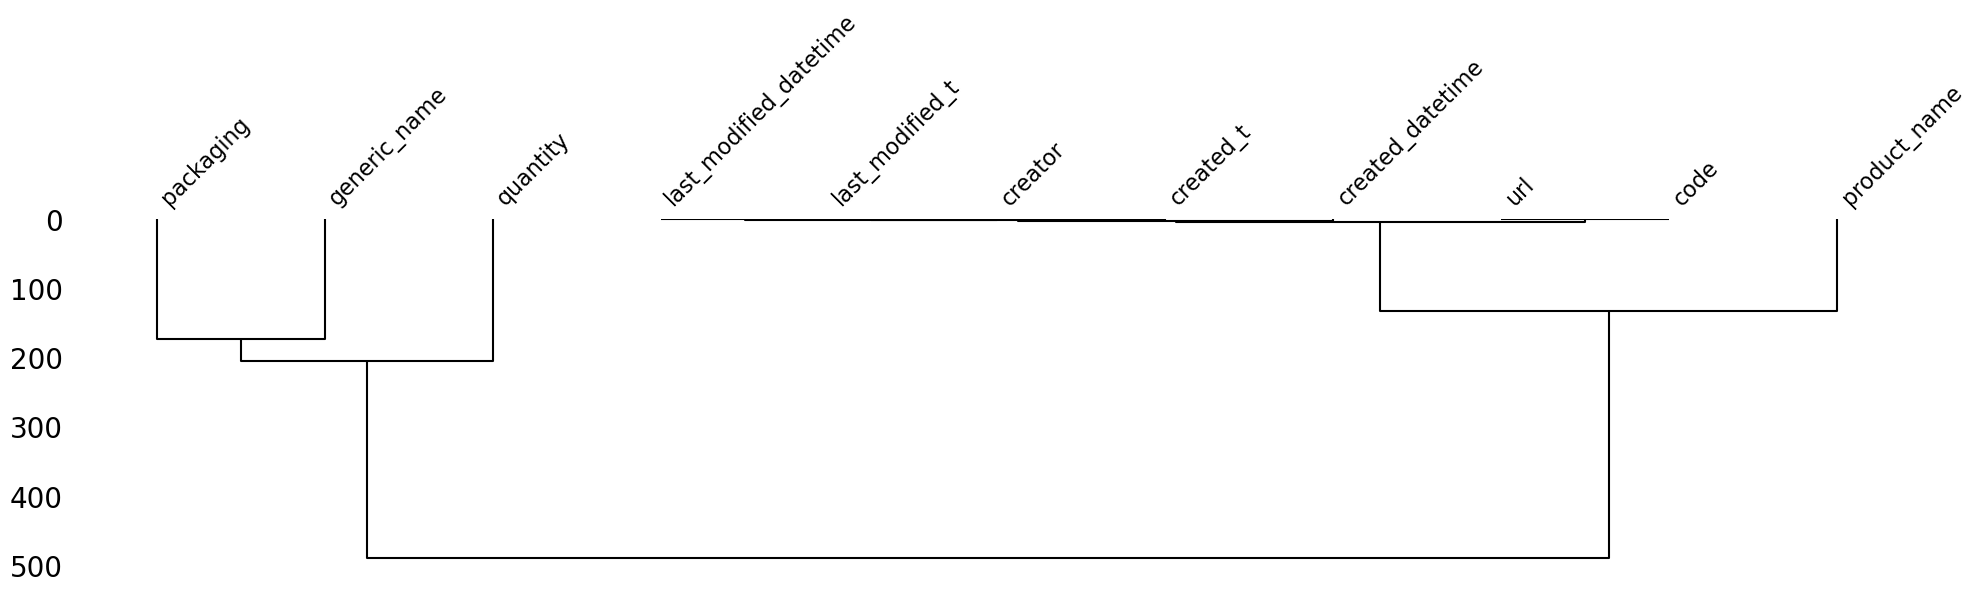

In [60]:
msno.dendrogram(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

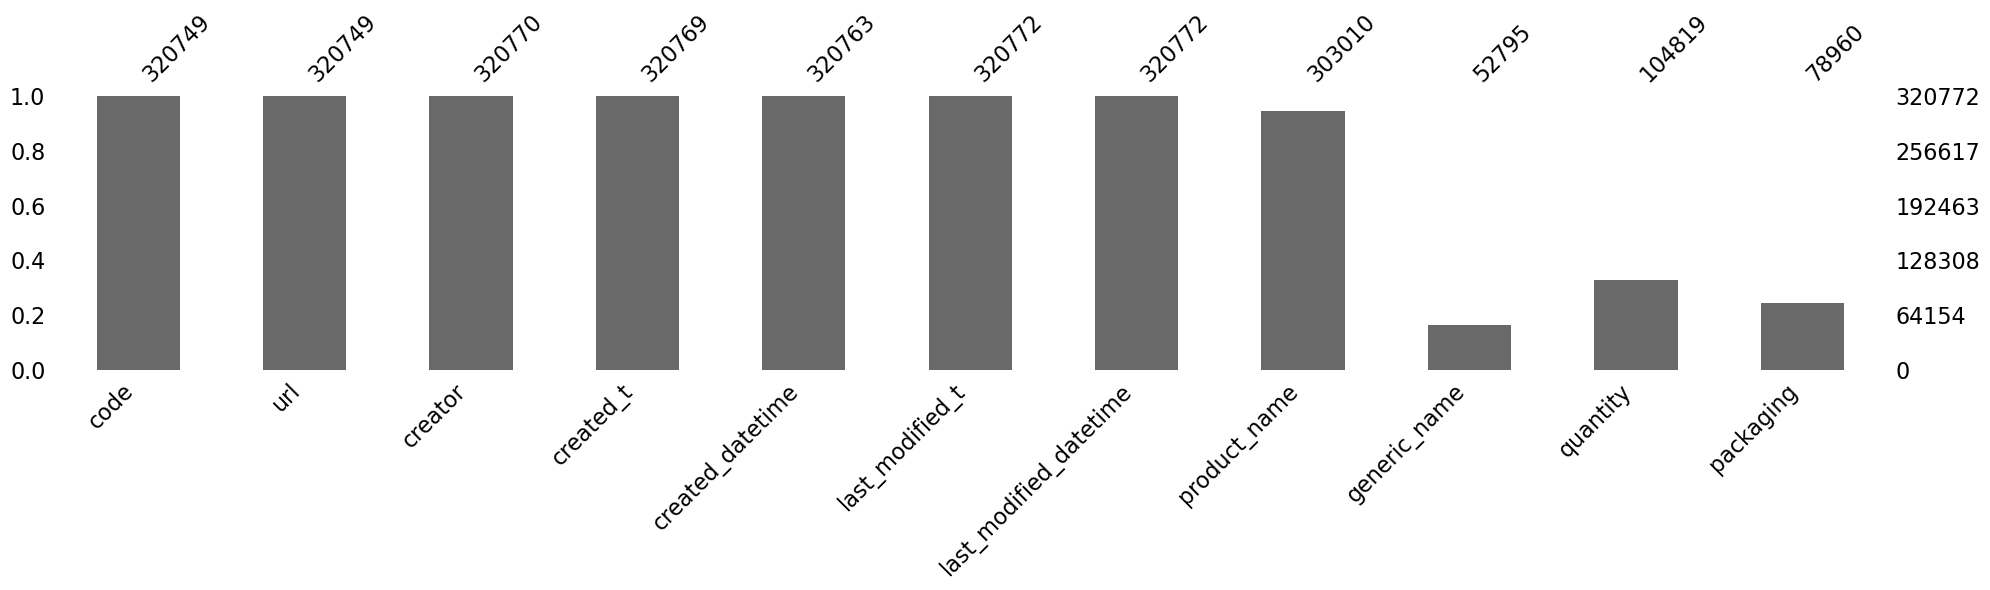

In [61]:
msno.bar(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [62]:
df_tags.sample(10)

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,...,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text
210986,"Barquette,Frais,Plastique","barquette,frais,plastique",U,u,"Saucisses,Saucisses françaises,Viandes,Chipola...","en:meats,en:prepared-meats,en:sausages,en:fren...","Viandes,Charcuteries,Saucisses,Saucisses franç...",France,france,France,...,"fr-49-323-032-ec,emb-49323b","47.516667,-0.466667",NaN,"saint-sylvain-d-anjou-maine-et-loire-france,sa...",France,U,France,en:france,France,"Viande de porc (origine France) 86%, gras de p..."
91855,NaN,NaN,Tampico Spice Co. Inc.,tampico-spice-co-inc,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Paprika
70480,NaN,NaN,Gifford's,gifford-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Cream, sugar, moose tracks fudge (powdered sug..."
212877,"Pot,Verre,Couvercle,Plastique","pot,verre,couvercle,plastique","Nature Bio,Cora","nature-bio,cora","Petit-déjeuners,Produits à tartiner,Produits à...","en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Courrières,France",Cora,France,en:france,France,"Sucre de canne, huiles végétales (huile de tou..."
88338,NaN,NaN,Foster Farms,foster-farms,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Chicken breast with rib meat, wheat flour, chi..."
248016,NaN,NaN,Bonne Maman,bonne-maman,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN
185383,NaN,NaN,Albona,albona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN
33485,NaN,NaN,"Full Circle, Topco","full-circle,topco",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic tomato puree, organic tomatoes, salt, ..."
232046,NaN,NaN,Terres et cereales bio,terres-et-cereales-bio,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN
76159,NaN,NaN,Paielli's,paielli-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Enriched wheat flour (wheat flour, niacin, red..."


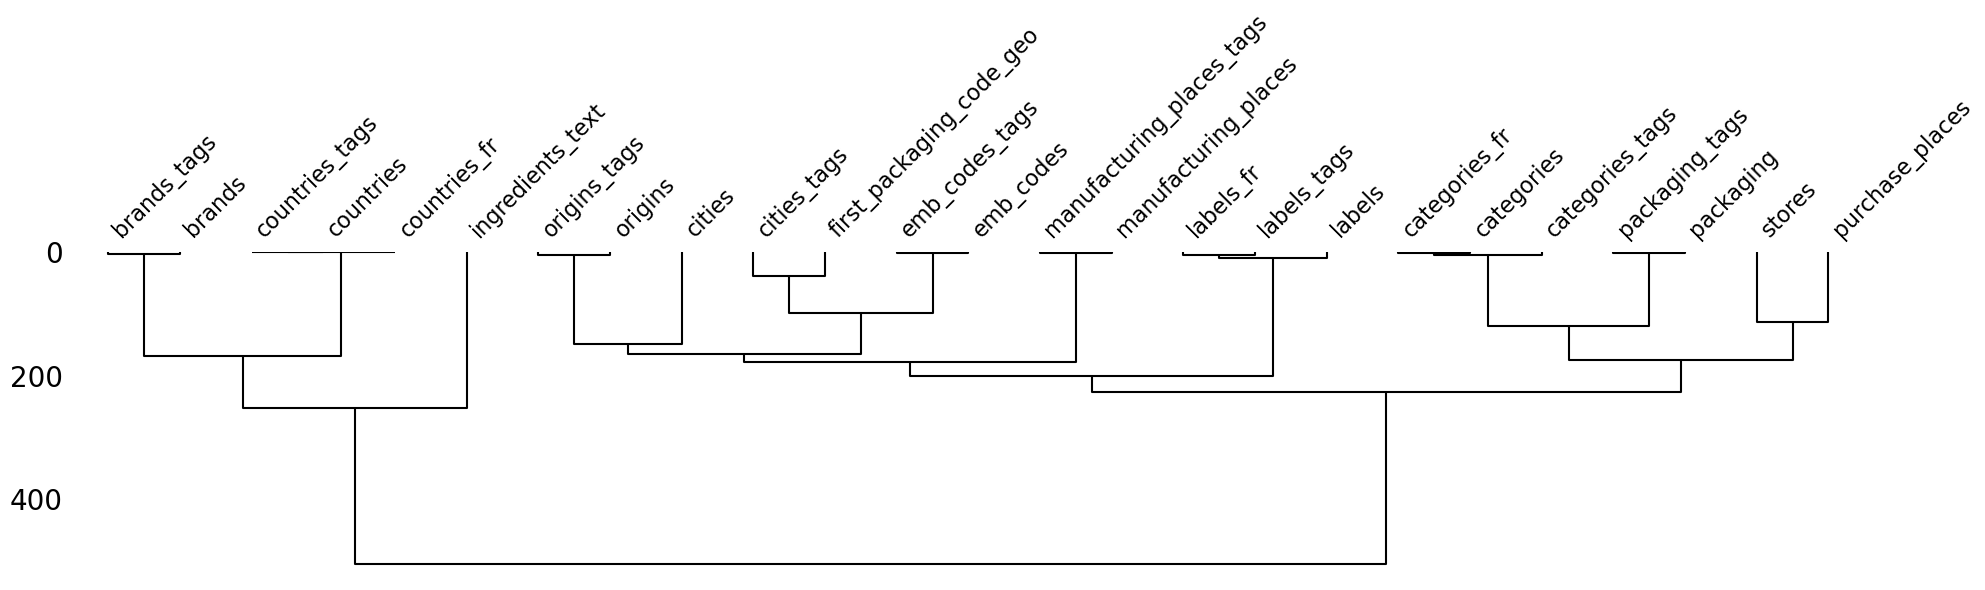

In [63]:
msno.dendrogram(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

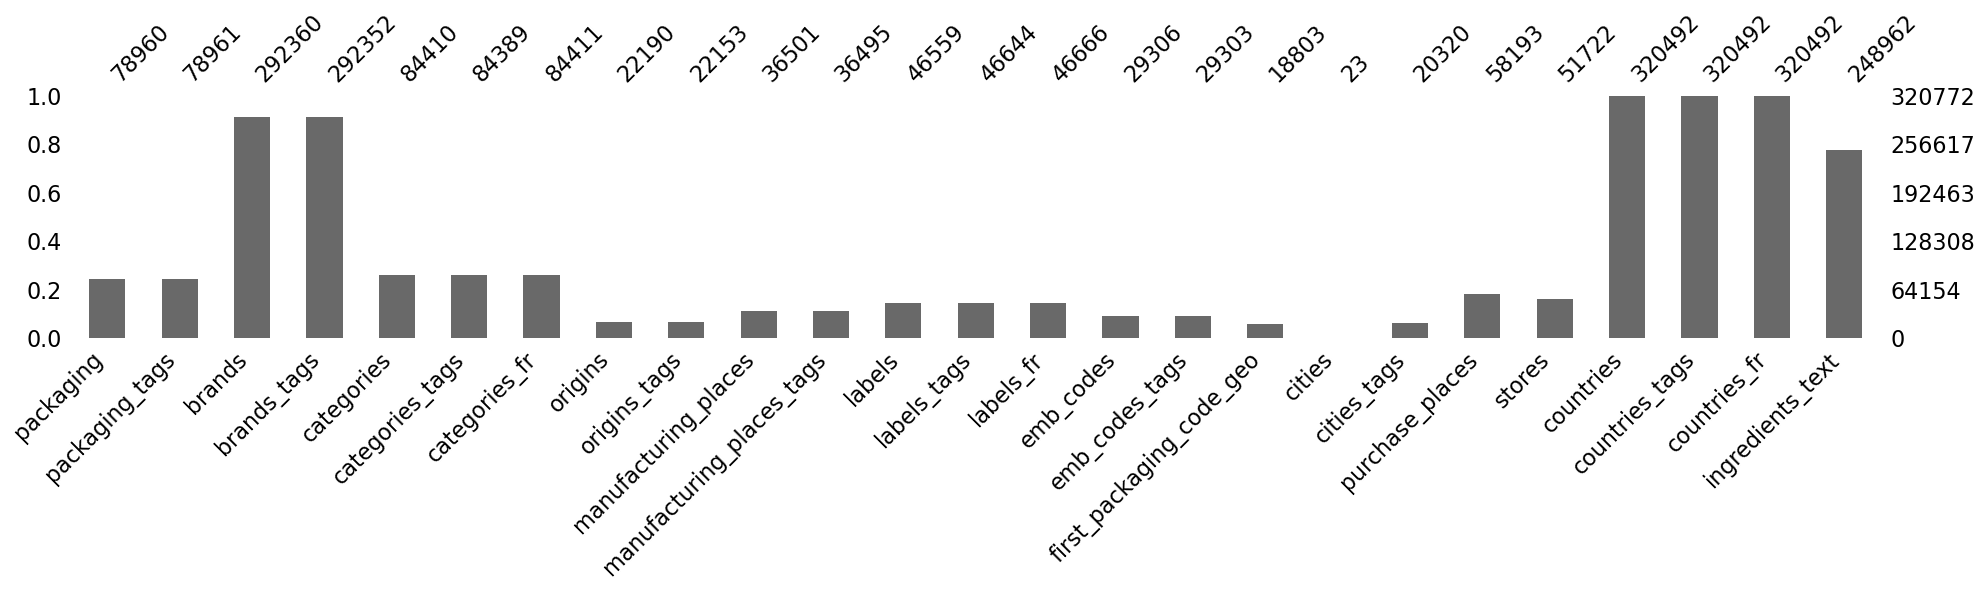

In [64]:
msno.bar(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [65]:
df_ingredients.sample(10)

,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size
92759,Olive oil.,NaN,NaN,NaN,NaN,NaN,15 ml (1 Tbsp)
114763,Sugar.,NaN,NaN,NaN,NaN,NaN,4 g (1 tsp)
125548,"Erythritol, dextrose with maltodextrin, rebian...",NaN,NaN,NaN,NaN,NaN,3.5 g (0.75 tsp)
54302,"Turkey breast meat, turkey broth, honey, conta...",NaN,NaN,NaN,NaN,NaN,56 g (2 ONZ)
35030,"Rehydrated potatoes (water, dehydrated potatoe...",NaN,NaN,NaN,NaN,NaN,369 g (1 TRAY)
121754,Organic popcorn.,NaN,NaN,NaN,NaN,NaN,30 g (5 cup)
112400,"Milk, sugar, cream, dextrose, vanilla extract,...",NaN,NaN,NaN,NaN,NaN,96 g (0.5 cup)
12378,"Organic vegetable stock (water, organic vegeta...",NaN,NaN,NaN,NaN,NaN,240 ml (1 cup)
17760,"Sugar, peanuts, butter (cream, salt), salt.",NaN,NaN,NaN,NaN,NaN,40 g (0.25 cup)
275176,miel bio,NaN,NaN,NaN,NaN,NaN,NaN


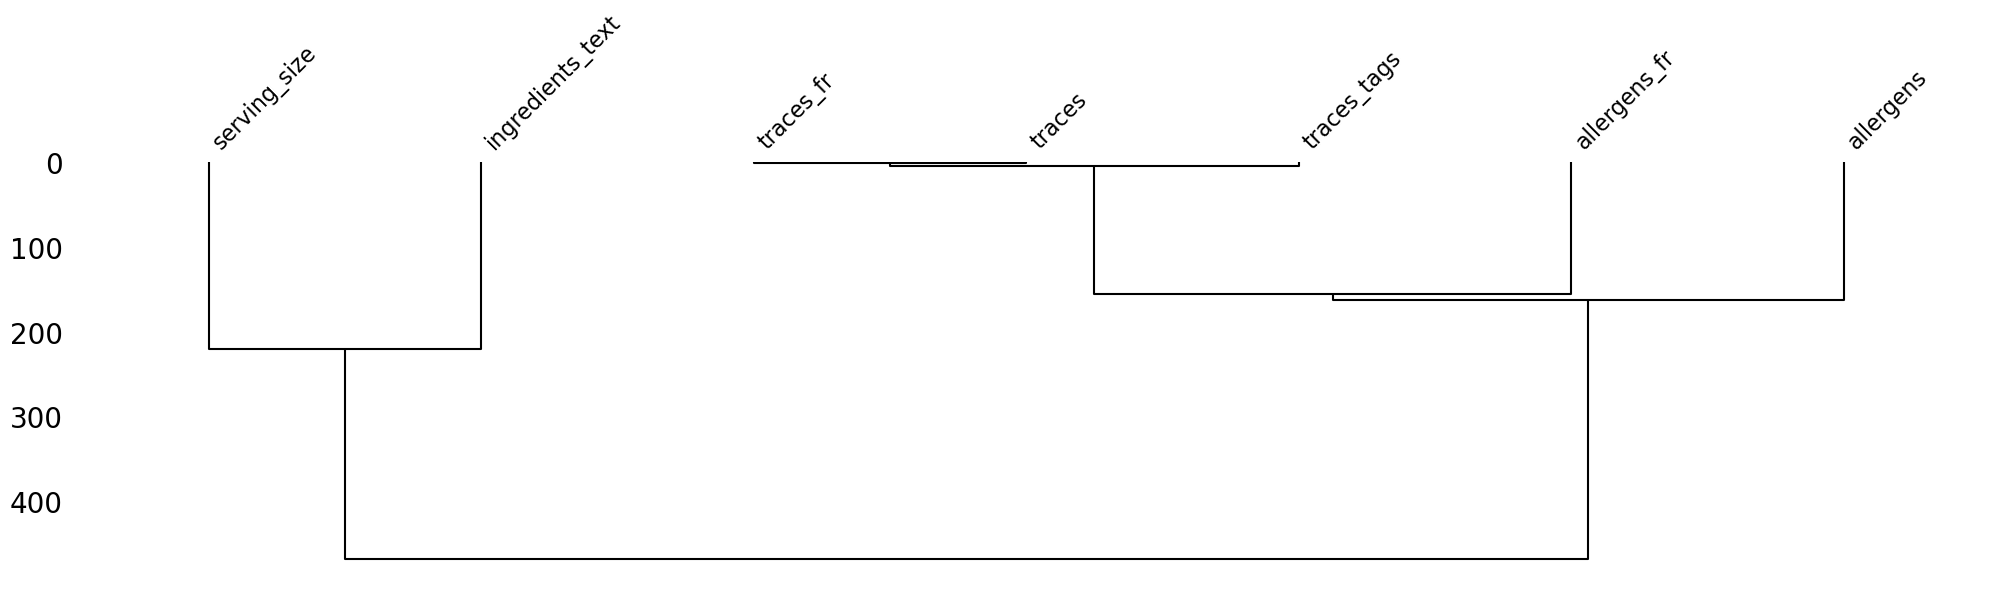

In [66]:
msno.dendrogram(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

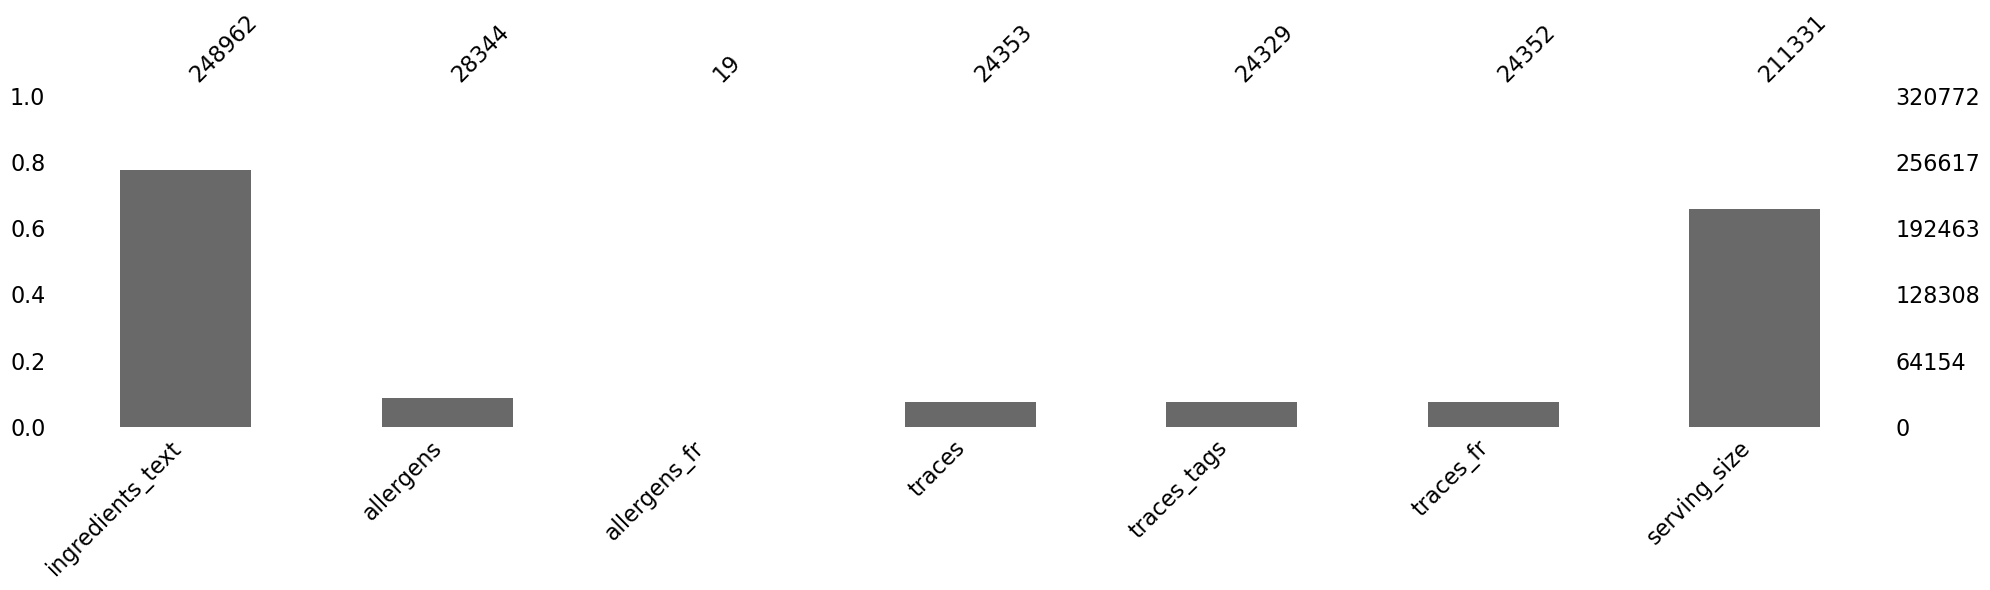

In [67]:
msno.bar(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [68]:
df_misc.sample(10)

,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g
200713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...,1582.0
161830,354 ml (1 BOTTLE),NaN,0.0,[ organic-carrot-juice -> en:organic-carrot-j...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,155.0
252987,NaN,NaN,0.0,[ pate-de-cacao-du-perou-65 -> fr:pate-de-cac...,NaN,NaN,0.0,NaN,NaN,0.0,...,Sugary snacks,Chocolate products,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:chocolates,Chocolats,http://fr.openfoodfacts.org/images/products/37...,http://fr.openfoodfacts.org/images/products/37...,2406.0
101521,45 g (0.25 cup),NaN,0.0,[ milagrosa -> en:milagrosa ],NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1490.0
42264,14 g (15 ML),NaN,0.0,[ olive-oil -> en:olive-oil ] [ oil -> en:o...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,3586.0
247361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1473.0
193032,25 g,NaN,0.0,[ miel-96 -> fr:miel-96 ] [ miel -> fr:miel...,NaN,NaN,0.0,NaN,NaN,0.0,...,Sugary snacks,Sweets,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:farming-products,Produits d'élevages,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,1360.0
213630,NaN,NaN,0.0,[ roquette -> fr:roquette ],NaN,NaN,0.0,NaN,NaN,0.0,...,Fruits and vegetables,Vegetables,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,Légumes frais,NaN,NaN,89.0
228989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1682.0
162709,35 g (0.5 PITA),NaN,0.0,[ 100-untreated-unbleached-wheat-flour -> en:...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1435.0


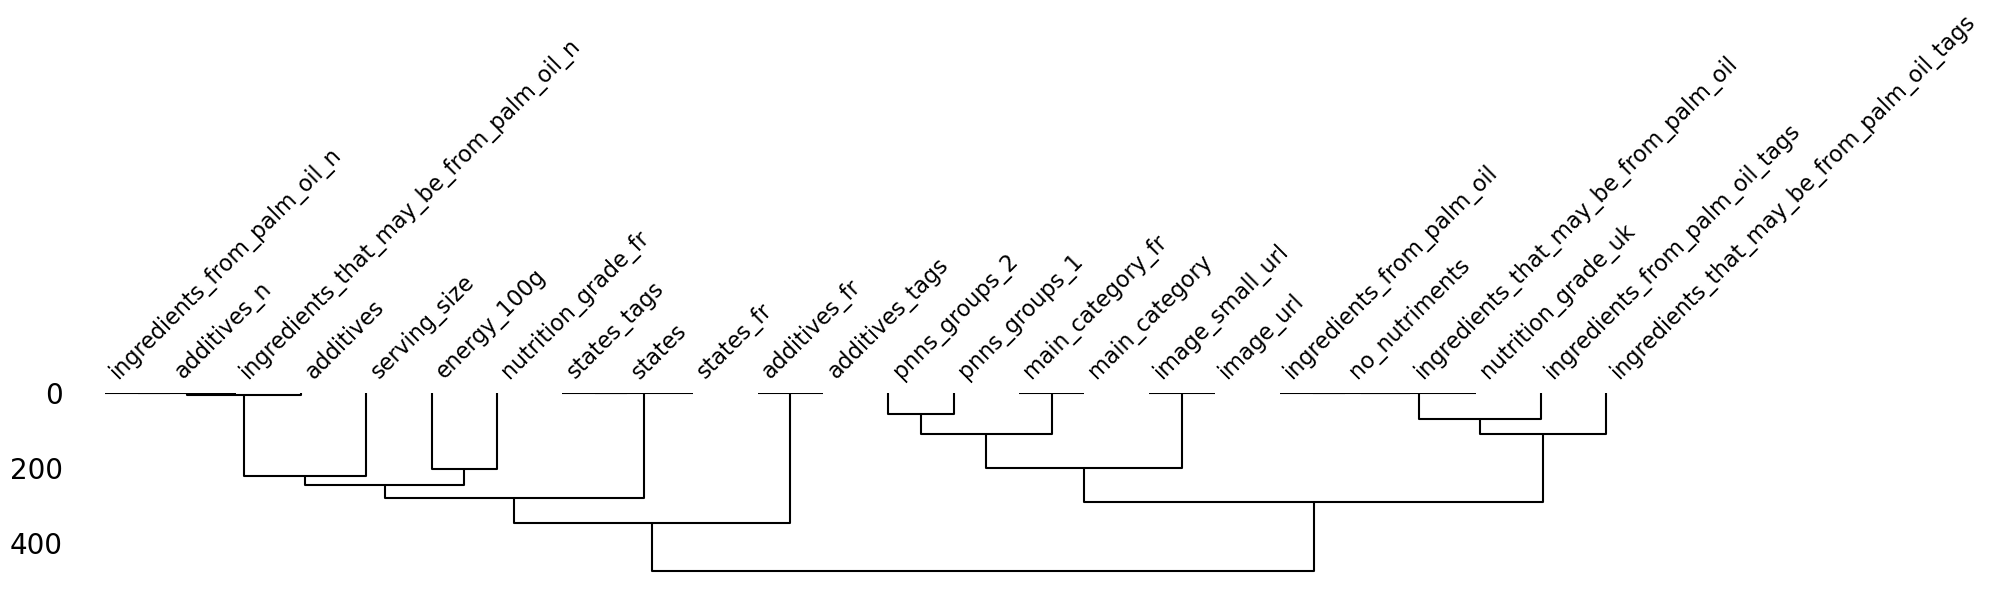

In [69]:
msno.dendrogram(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

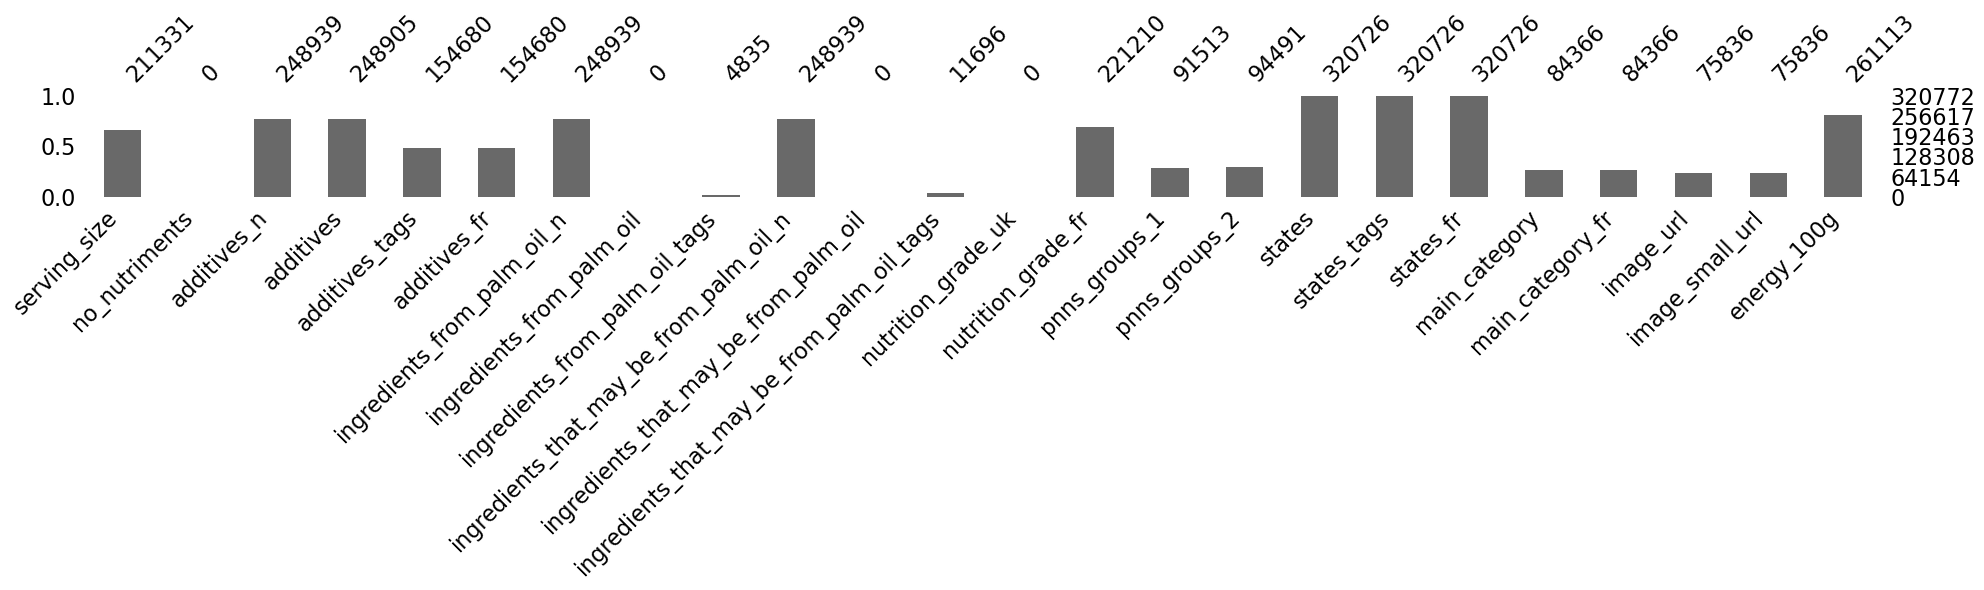

In [70]:
sns.reset_orig()
msno.bar(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

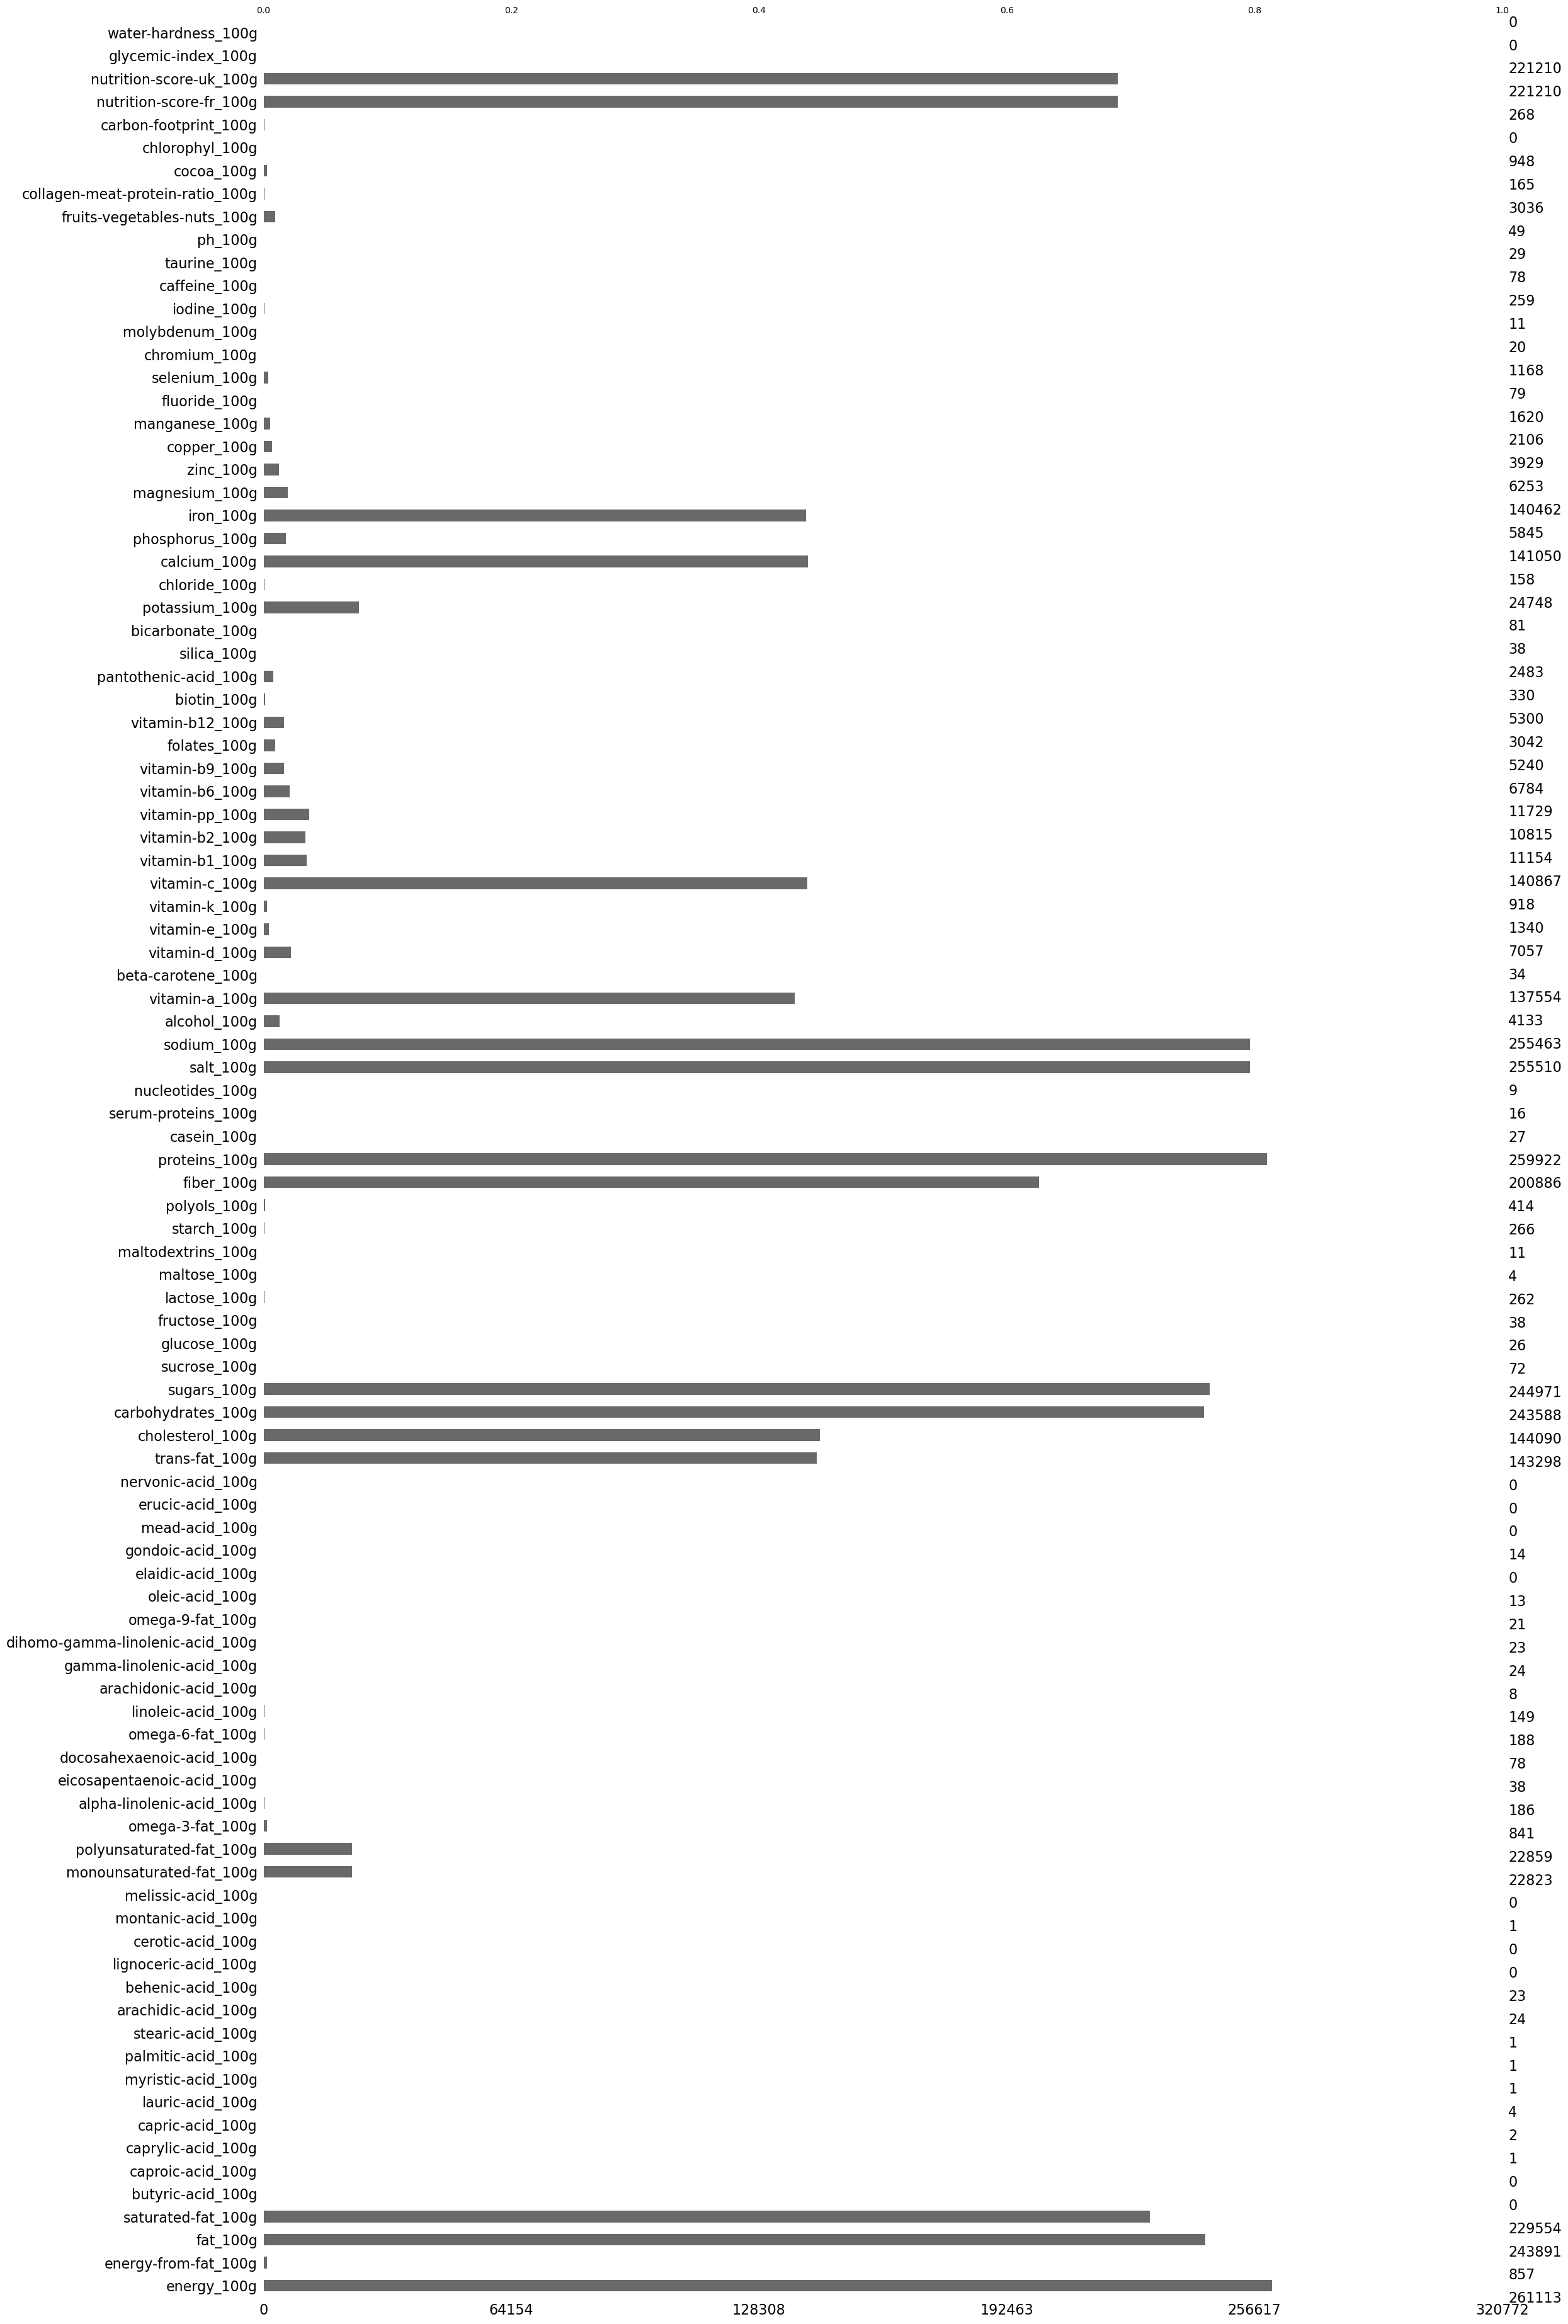

In [71]:
msno.bar(df_nutrition)
plt.tight_layout()
plt.show()

In [72]:
target = 'main_category'

features = [
    'creator',
    'ingredients_text',
    'pnns_group_1',
    'countries_tags',
    'brands',
    'saturated-fat_100g',
    'sugars_100g',
    'proteins_100g',
    'cholesterol_100g',
    'energy_100g',
]

In [73]:
sns.set()

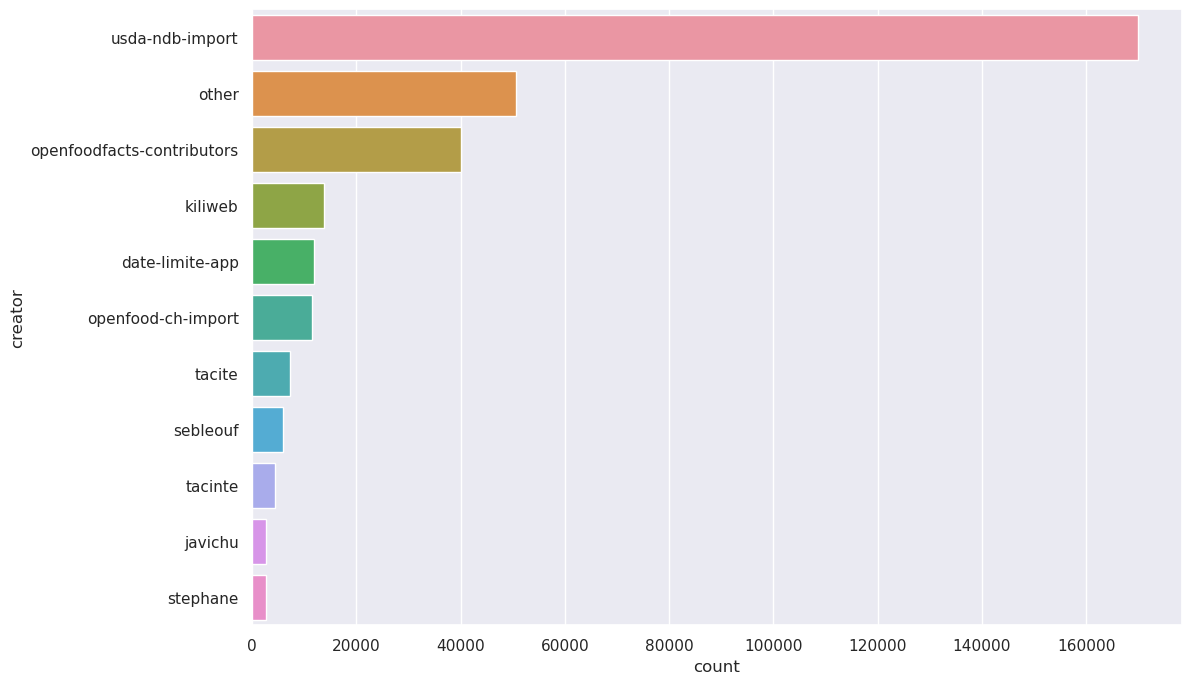

In [74]:
plt.figure(figsize=(12, 8))

df_creator = df_gen["creator"]
df_creator_id = df_creator.value_counts().index
top_creators = df_creator_id[:10]
df_creator = df_creator.map(
    {i: i if i in top_creators else "other" for i in df_creator_id}
)

sns.countplot(y=df_creator, order=df_creator.value_counts().index)
plt.show()

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class DataSelector(BaseEstimator, TransformerMixin):

    def __init__(self, features=[], target=''):
        self.features = features
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.dropna(subset=self.target)[self.features + [self.target]] \
             .drop_duplicates(subset=self.features)

        return X

In [112]:
class ProbaImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, probs=None):
        self.probs = probs

    def fit(self, X, y=None):
        self.val_count_norm = X.dropna().value_counts(normalize=True)
        self.probs = pd.to_numeric(self.val_count_norm.values, errors="coerce")
        return self

    def transform(self, X):
        def imputer_choice(row):
            if pd.isnull(row):
                self.choices = self.val_count_norm.index.tolist()
                return np.random.choice(self.choices, p=self.probs)
            else:
                return row

        return X.apply(imputer_choice)

In [119]:
pi = ProbaImputer()

df_creator_imputed = pi.fit_transform(df_creator)

mask = df_creator != df_creator_imputed
df_creator_imputed[mask]


273670    openfoodfacts-contributors
274024                       kiliweb
Name: creator, dtype: object

In [ ]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [ ]:
df_ing = df_ingredients['ingredients_text'].astype(str).str.lower()
df_ing = df_ing.apply(word_tokenize)

In [ ]:
df_ing.apply(lambda x: [i for i in x if len(i) > 1])

0                                                     [nan]
1         [bananas, vegetable, oil, coconut, oil, corn, ...
2         [peanuts, wheat, flour, sugar, rice, flour, ta...
3         [organic, hazelnuts, organic, cashews, organic...
4                                        [organic, polenta]
                                ...                        
320767                                                [nan]
320768    [organic, peppermint, organic, lemon, grass, o...
320769                                                [nan]
320770                                                [nan]
320771    [citric, acid, maltodextrin, instant, tea, asp...
Name: ingredients_text, Length: 320772, dtype: object

In [ ]:
all_words = ' '.join([word for rows in df_ing for word in rows])
all_words[:20]

'nan bananas , vegeta'

Counter(all_words).most_common(10)

In [ ]:
df_serving_size = df_misc['serving_size'].str.lower().dropna()

In [ ]:
conversion_dict = {
    'tsp':      (5, 'ml'),
    'cl':       (10, 'ml'),
    'tbsp':     (15, 'ml'),
    'fl oz':    (29, 'ml'),
    'dl':       (100, 'ml'),
    'cup':      (240, 'ml'),
    'tasse':    (240, 'ml'),
    'bottle':   (750, 'ml'),
    'l':        (1000, 'ml'),
    'litre':    (1000, 'ml'),
}

In [ ]:
for c in conversion_dict.keys():
    df_serving_size = df_serving_size[~df_serving_size.str.contains(c)][
                                      ~df_serving_size.str.contains('g')][
                                      ~df_serving_size.str.contains('ml')]
len(df_serving_size)

329

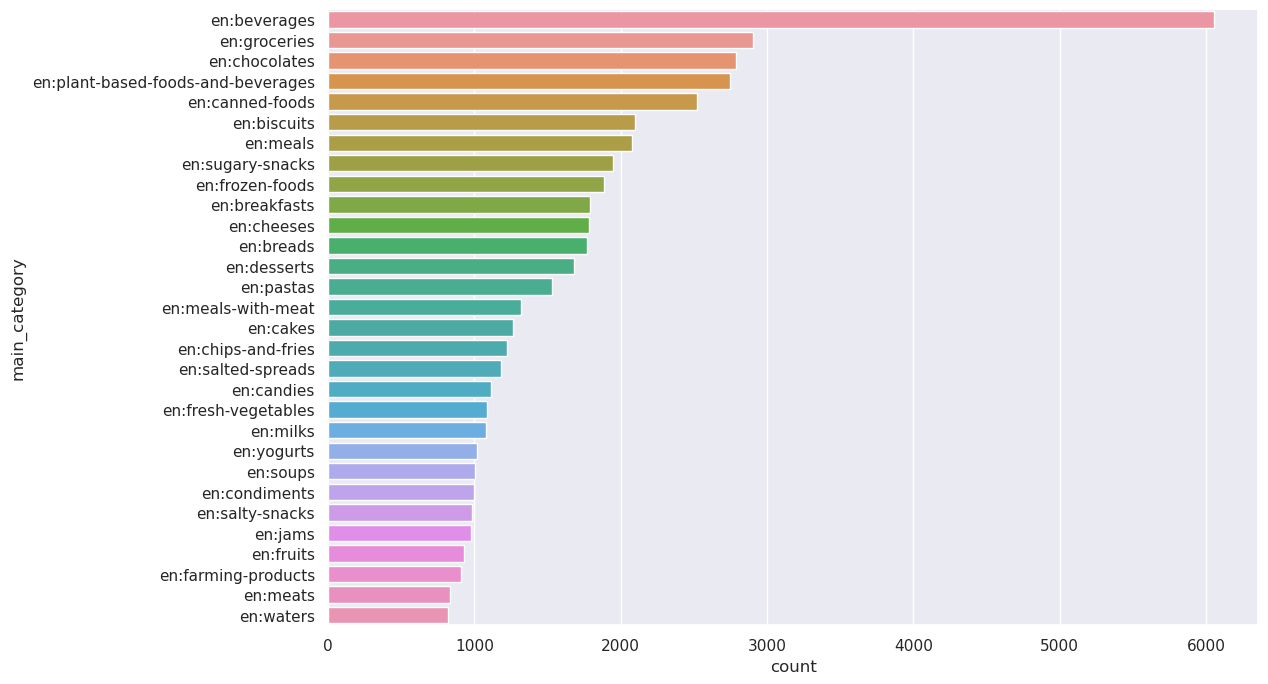

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_misc, y='main_category', order=df_misc.main_category.value_counts()[:30].index)
plt.show()

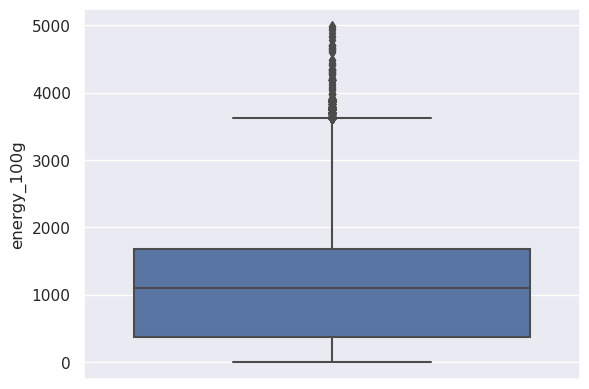

In [ ]:
sns.boxplot(y = df_nutrition['energy_100g'][
                    ~df_nutrition['energy_100g'].isna()][
                        df_nutrition['energy_100g'] < 5000])
plt.show()

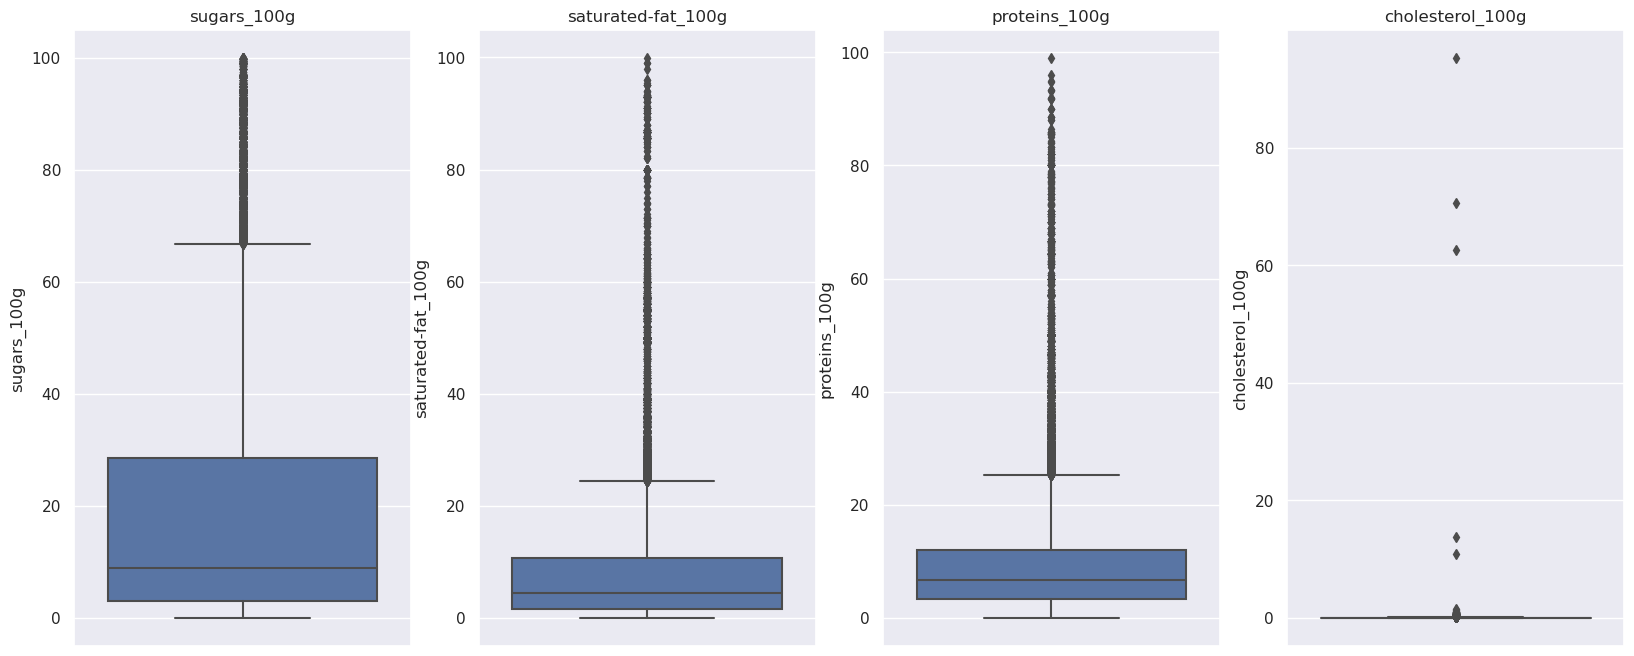

In [ ]:
fig = plt.figure(figsize=(20,8))

for i, label in enumerate(['sugars_100g', 'saturated-fat_100g', 'proteins_100g', 'cholesterol_100g']):
    fig.add_subplot(1, 4, i + 1)
    sns.boxplot(y = df_nutrition[label][
                        ~df_nutrition[label].isna()][
                            df_nutrition[label] < 100][
                                df_nutrition[label] > 0])
    plt.title(label)
plt.show()

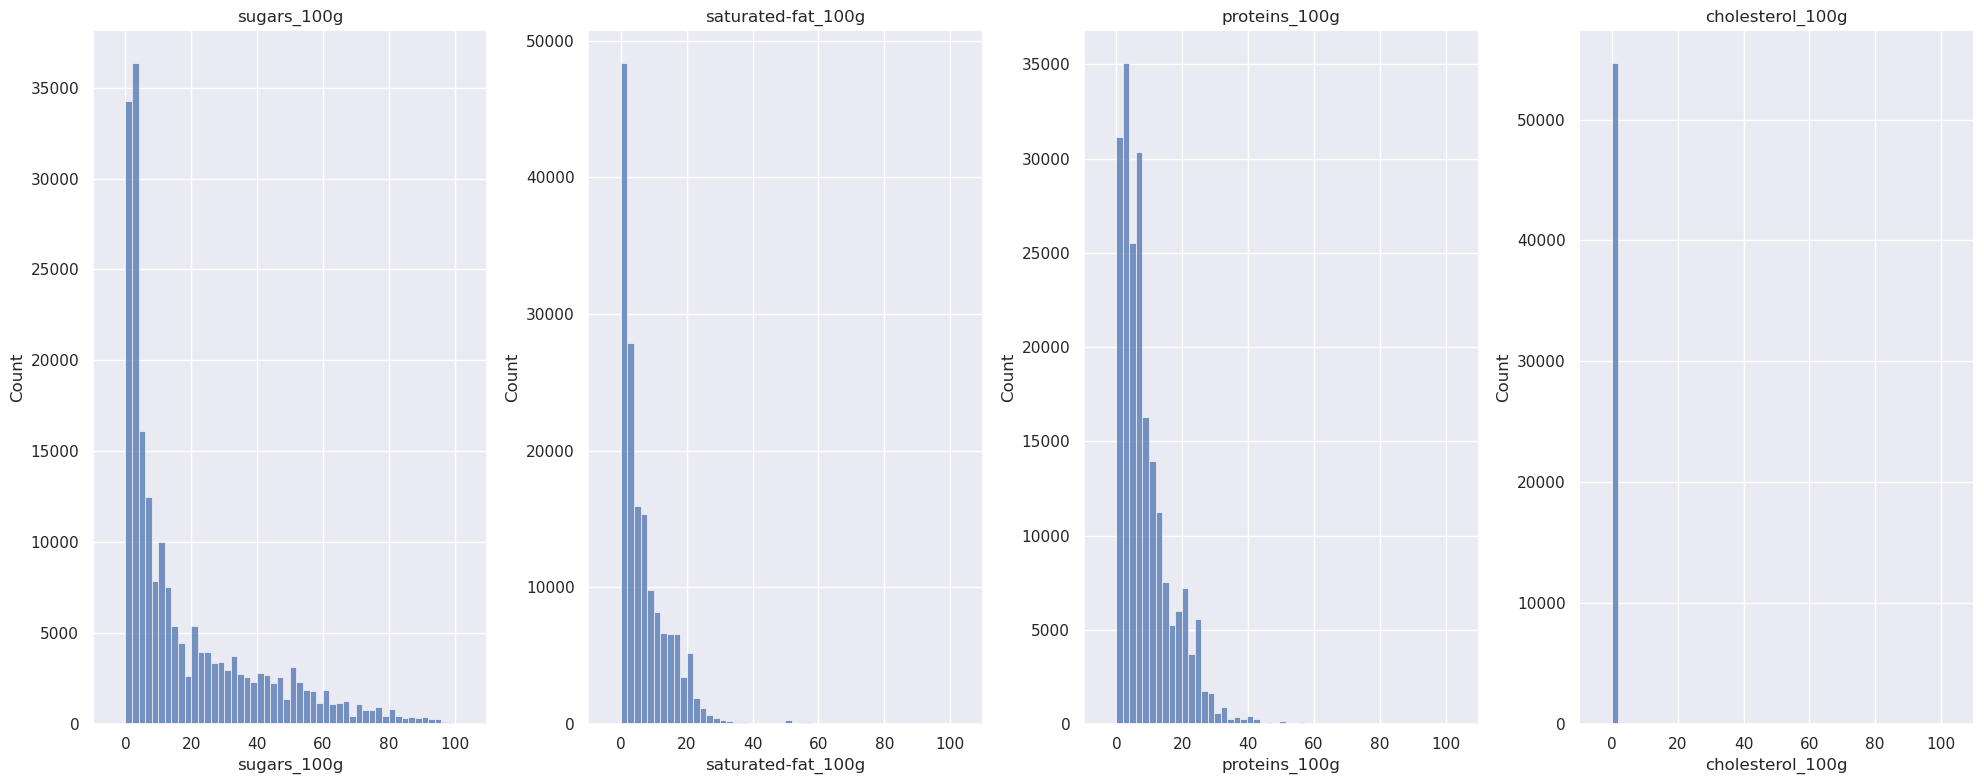

In [ ]:
fig = plt.figure(figsize=(20,8))

for i, label in enumerate(['sugars_100g', 'saturated-fat_100g', 'proteins_100g', 'cholesterol_100g']):
    fig.add_subplot(1, 4, i + 1)
    sns.histplot(df_nutrition[label][
            ~df_nutrition[label].isna()][
                df_nutrition[label] < 100][
                    df_nutrition[label] > 0
                        ], bins=50)
    plt.xlim(-10, 110)
    plt.title(label)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import norm, t

def fit_norm(standardized_data, x):
    mu, std = norm.fit(standardized_data)
    n_prob = norm.pdf(x, mu, std)
    return n_prob, mu, std

def fit_t(standardized_data, x):
    params = t.fit(standardized_data)
    df, loc, t_scale = params
    t_prob = t.pdf(x, df, loc, t_scale)
    return t_prob, df, loc, t_scale

def filter_iqr(data):
    # Identify and filter out outliers based on the IQR method
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

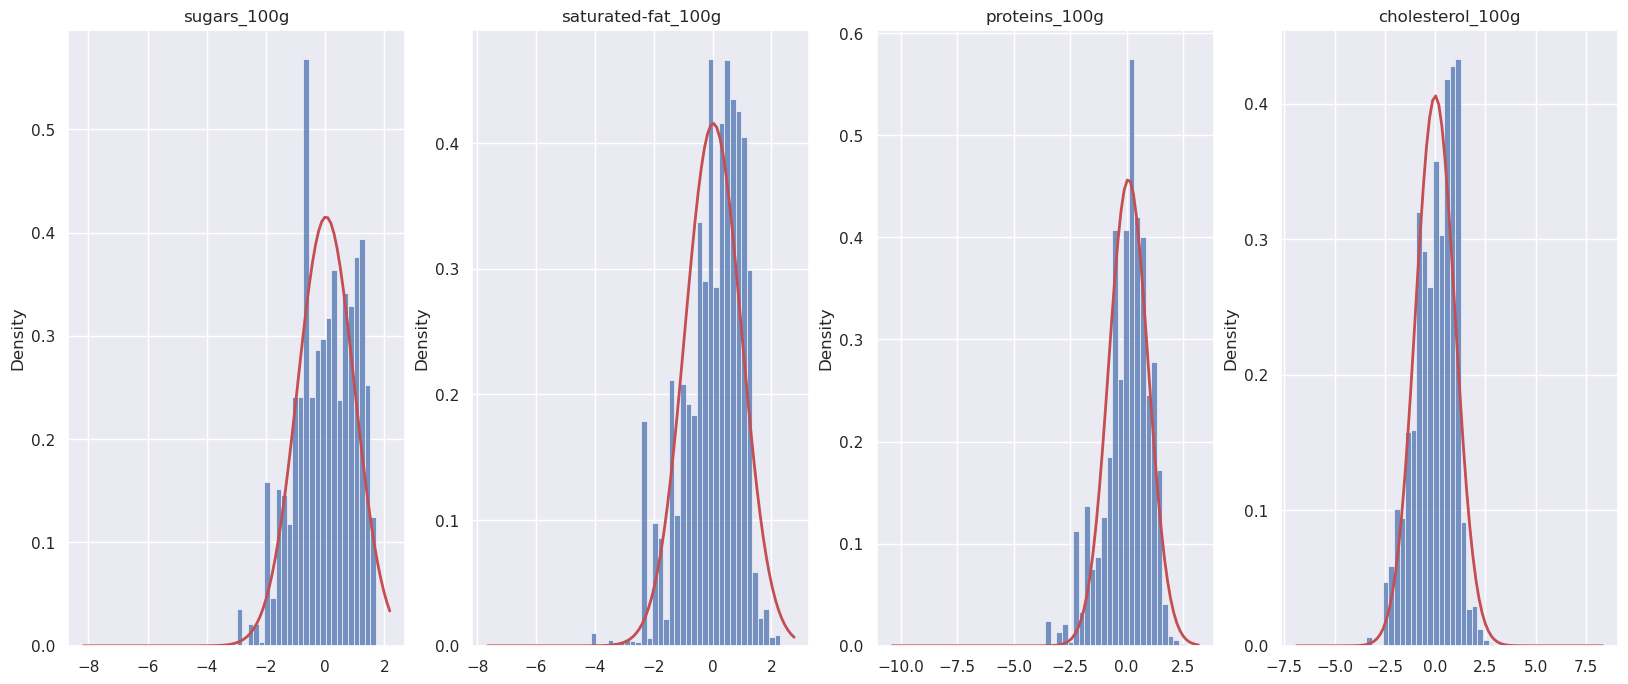

In [ ]:
from sklearn.preprocessing import scale
from scipy.stats import norm

fig = plt.figure(figsize=(20, 8))

norm_stats = []

for i, label in enumerate(
    ["sugars_100g", "saturated-fat_100g", "proteins_100g", "cholesterol_100g"]
):
    fig.add_subplot(1, 4, i + 1)

    std_data = scale(
        df_nutrition[label][~df_nutrition[label].isna()][df_nutrition[label] < 100][
            df_nutrition[label] > 0
        ].apply(np.log)
    )

    sns.histplot(std_data, bins=50, stat="density")

    xmin, xmax = plt.xlim()
    x_values = np.linspace(xmin, xmax, 100)

    lower_bound, upper_bound = filter_iqr(std_data)
    n_prob, mu, std = fit_norm(
        std_data[(std_data >= lower_bound) & (std_data <= upper_bound)], x_values
    )

    norm_stats.append((label, std_data, mu, std))

    plt.plot(x_values, n_prob, "r", linewidth=2)
    plt.title(label)
plt.show()

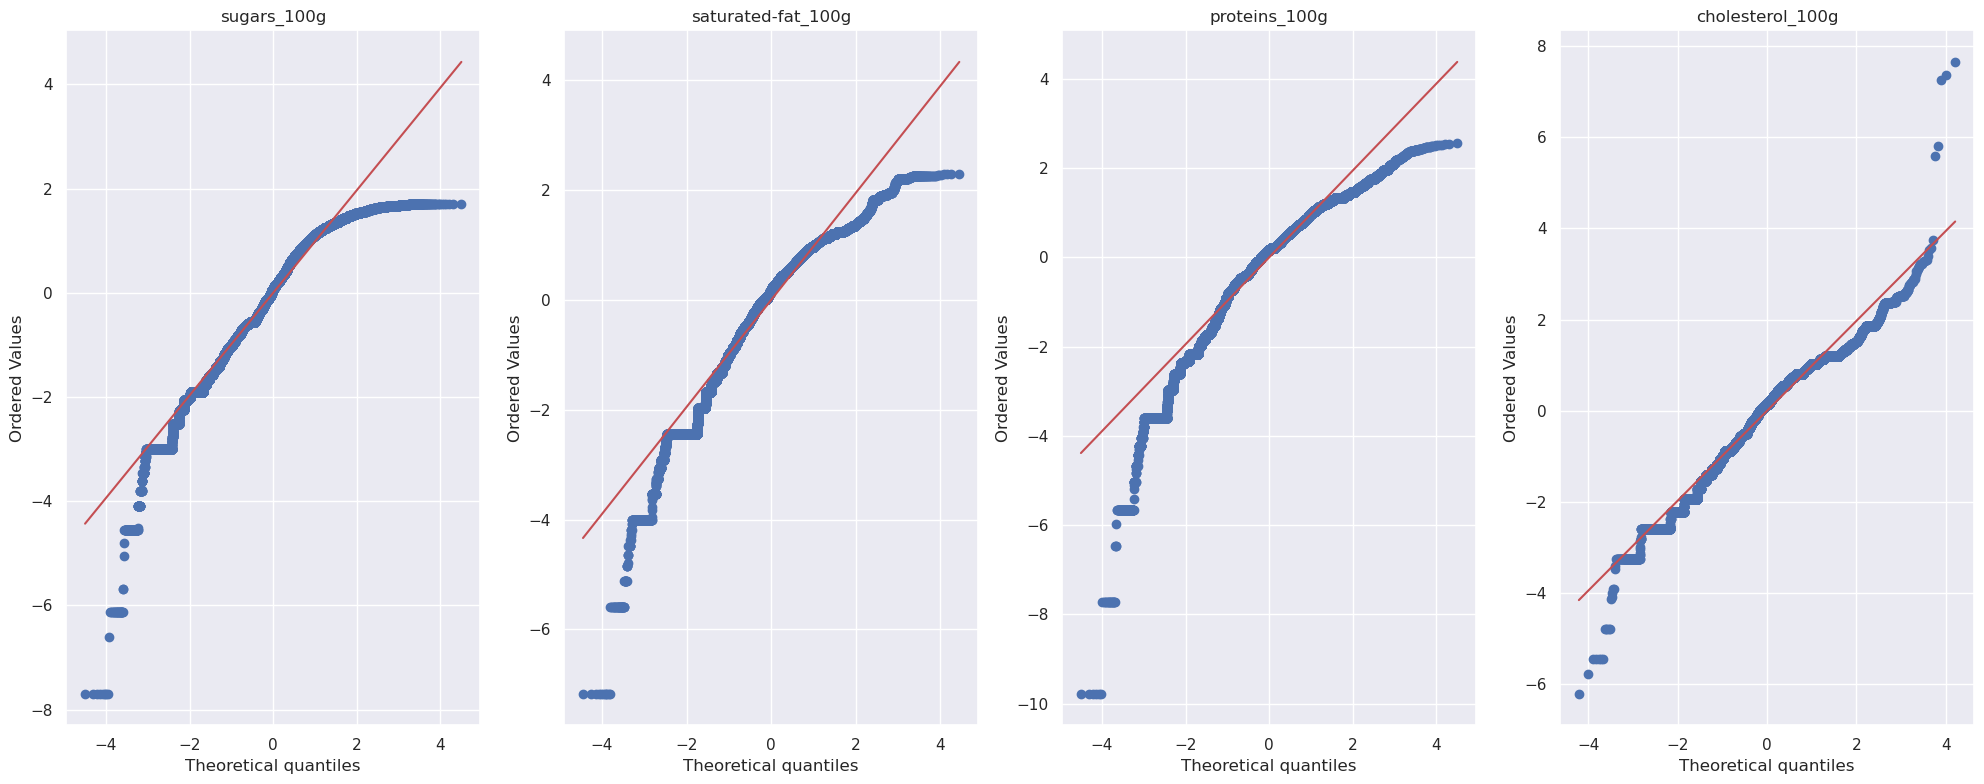

In [ ]:
from scipy.stats import probplot

fig, axes = plt.subplots(1,4, figsize=(20,8))

for i, (label, std_data, mu, std) in enumerate(norm_stats):
    ax = axes[i]
    probplot(std_data, dist='norm', plot=ax)
    ax.set_title(label)

plt.tight_layout()
plt.show()

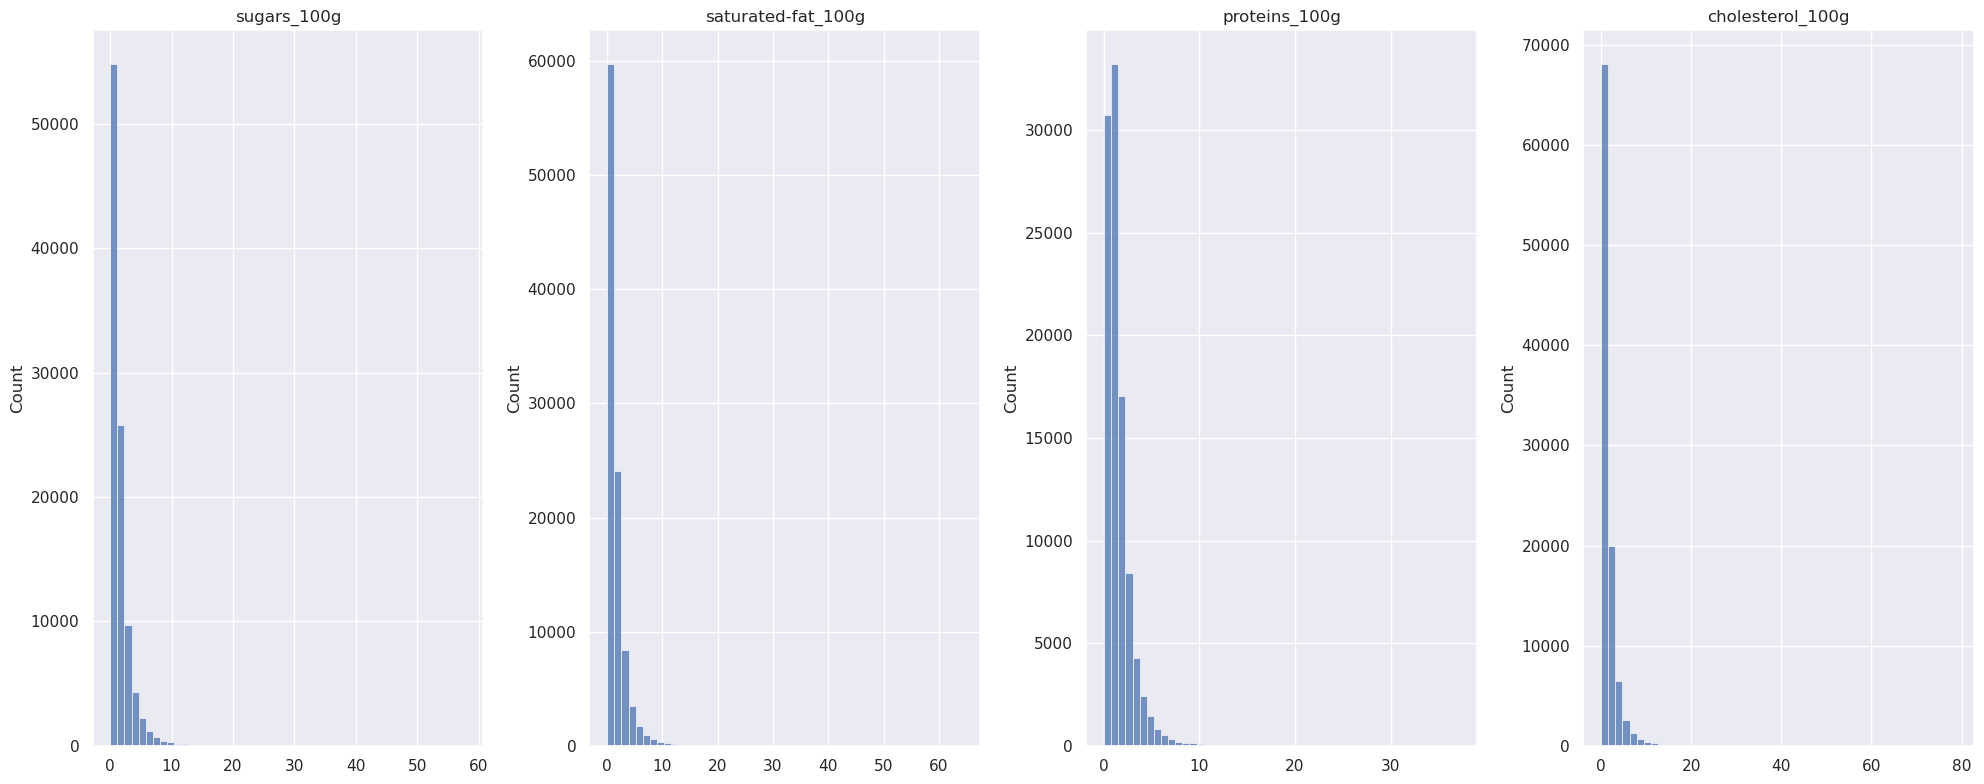

In [ ]:
fig = plt.figure(figsize=(20, 8))

for i, (label, std_data, mu, std) in enumerate(norm_stats):
    fig.add_subplot(1, 4, i + 1)
    reverse_transform = np.exp((norm.rvs(mu, std, size=100000) * std) + mu)
    sns.histplot(reverse_transform, bins=50)
    plt.title(label)
plt.tight_layout()
plt.show()

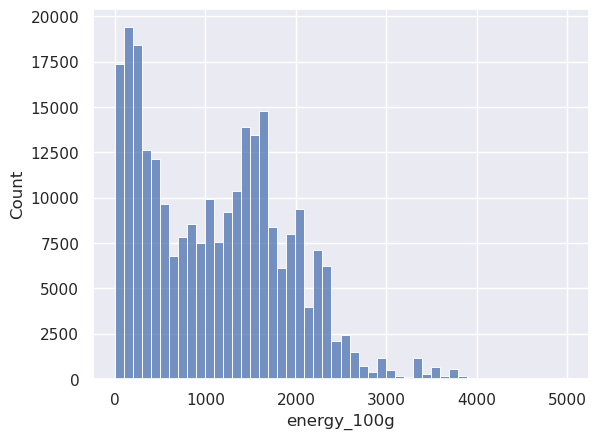

In [ ]:
sns.histplot(
    df_nutrition["energy_100g"][~df_nutrition["energy_100g"].isna()][
        df_nutrition["energy_100g"] < 5000
    ],
    bins=50,
)

plt.show()

In [ ]:
std_data = scale(df_nutrition["energy_100g"][~df_nutrition["energy_100g"].isna()][
        df_nutrition["energy_100g"] < 5000
    ][df_nutrition["energy_100g"] > 0].apply(np.log))

sns.histplot(
    std_data,
    stat='density',
    bins=50,
    color='gray'
)

mu, std = norm.fit(std_data)
params = t.fit(std_data)
df, loc, t_scale = params

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
n = norm.pdf(x, mu, std)
t = t.pdf(x, df, loc, t_scale)

plt.plot(x, n, 'b', linewidth=2)
plt.plot(x, t, 'r', linewidth=2)
plt.show()

NameError: name 'scale' is not defined

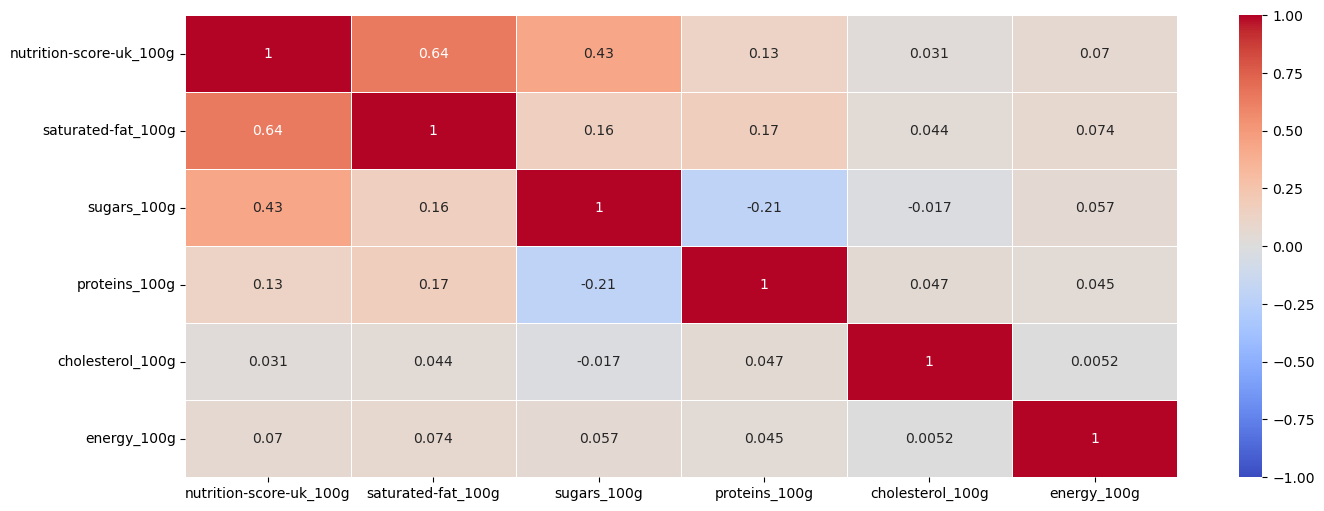

In [ ]:
cm = df[
    [
        "nutrition-score-uk_100g",
        "saturated-fat_100g",
        "sugars_100g",
        "proteins_100g",
        "cholesterol_100g",
        "energy_100g",
    ]
].corr()

fig = plt.figure(figsize=(16, 6))

sns.heatmap(cm, linewidths=0.4, cmap="coolwarm", vmin=-1, annot=True)

plt.show()

In [ ]:
data = df.dropna(subset=target)[features + [target]]
data.shape

(84366, 7)

In [ ]:
data = data.drop_duplicates(subset=features)
data.shape

(78749, 7)

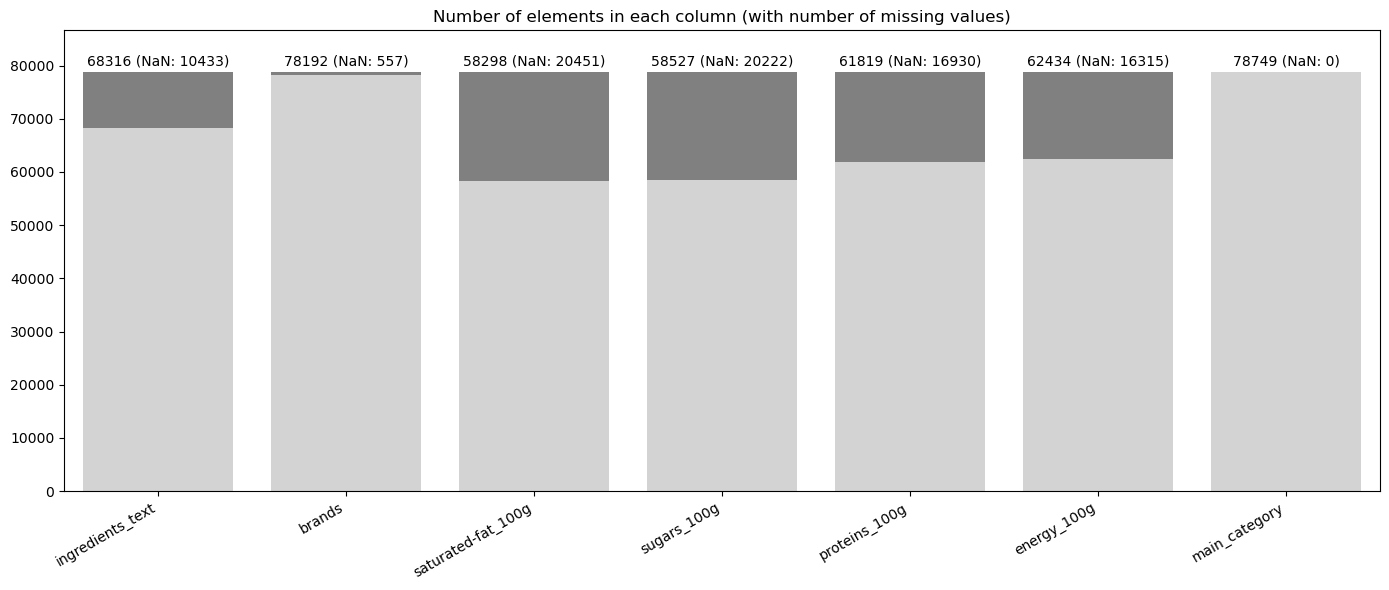

In [ ]:
plt.figure(figsize=(14, 6))
bar_total = sns.barplot(
    x=data.count().index, y=[len(data)] * len(data.count()), color="gray"
)
bar_elements = sns.barplot(
    x=data.count().index, y=data.count().values, color="lightgray"
)

for i, value in enumerate(data.count().values):
    bar_total.text(
        i,
        1.01 * len(data),
        f"{value} (NaN: {len(data) - value})",
        ha="center",
        va="bottom",
        color="black",
    )

bar_total.set_ylim(0, 1.1 * len(data))

plt.xticks(rotation=30, ha="right")
plt.title("Number of elements in each column (with number of missing values)")
plt.tight_layout()
plt.show()

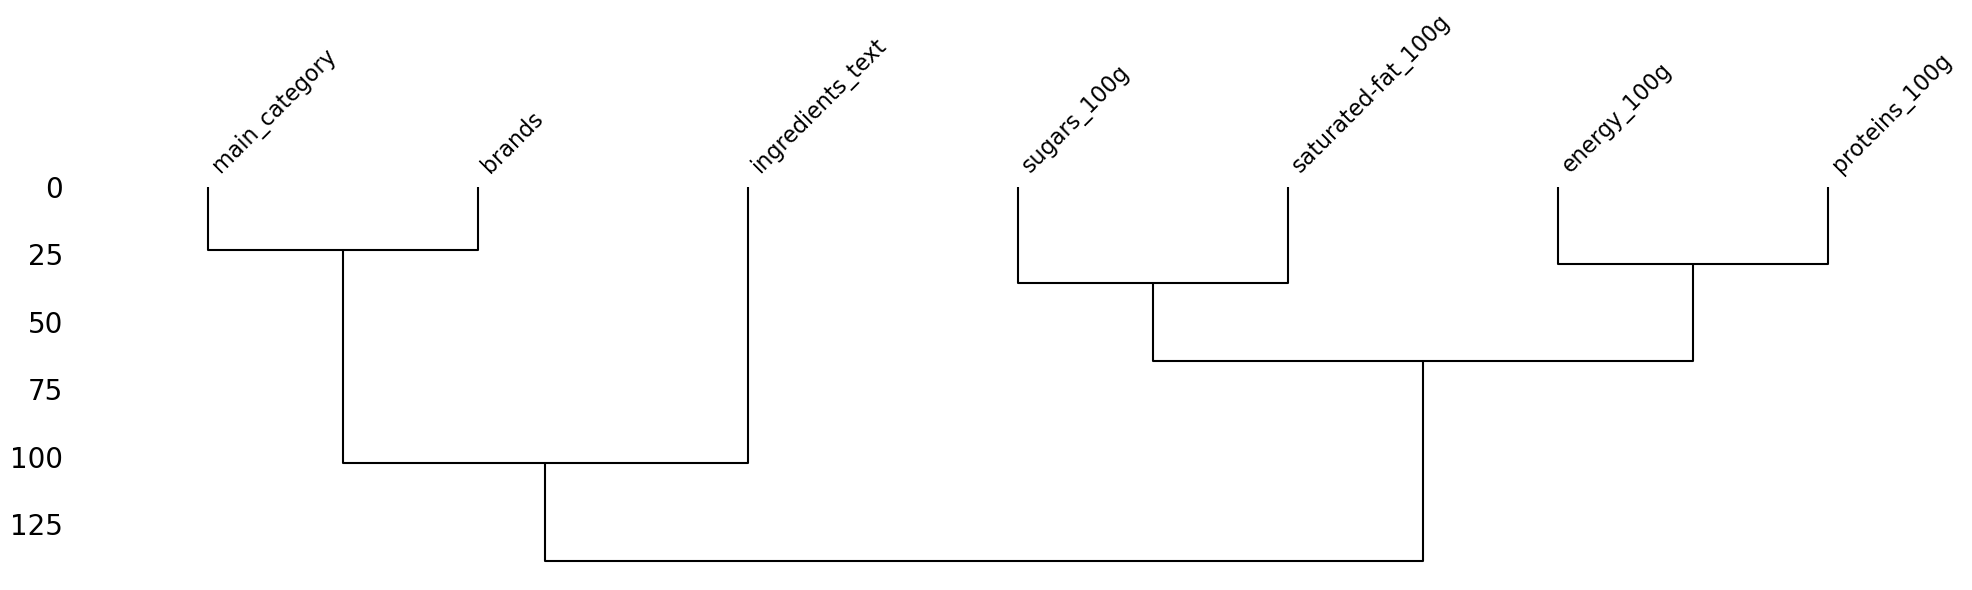

In [ ]:
msno.dendrogram(data, figsize=(20, 6))
plt.tight_layout()
plt.show()